In [1]:
### ValDXer testing
import os
os.environ['HDXER_PATH'] = '/home/alexi/Documents/HDXer'


In [2]:
# from autonotebook import tqdm as notebook_tqdm

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings(name='test')
settings.replicates = 3
settings.gamma_range = (1,8)
settings.train_frac = 0.5
settings.times = [0.0, 0.5, 5.0]
settings.RW_exponent = [0]
settings.HDXer_stride = 500
import pickle

VDX = ValDXer(settings)
expt_name = 'HOIP_dab3'
test_name = "HOIPdab3"


/home/alexi/Documents/ValDX


/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name test already exists. Attempting to change name to test0
Experiment name test already exists. Attempting to change name to test1
Experiment name test already exists. Attempting to change name to test2
Experiment name test already exists. Attempting to change name to test3
Experiment name test already exists. Attempting to change name to test4
Experiment name test already exists. Attempting to change name to test5
Experiment name test already exists. Attempting to change name to test6
Experiment name test already exists. Attempting to change name to test7
Experiment name test already exists. Attempting to change name to test8
Experiment name test already exists. Attempting to change name to test9
Experiment name test already exists. Attempting to change name to test10
Experiment name test already exists. Attempting to change name to test11
Experiment name test already exists. Attempting to change name 

In [3]:
import os
print(os.getenv('HDXER_PATH'))


/home/alexi/Documents/HDXer


In [4]:
print(os.environ["HDXER_PATH"])
print(__name__)

/home/alexi/Documents/HDXer
__main__


In [5]:
import pandas as pd
raw_csv = os.path.join("raw_data", "HOIP","dab3","dab3_3_excel.csv")

raw_df = pd.read_csv(raw_csv)
# remove multilevel columns


In [6]:
# print(raw_df.head())

# select state dab3
dab3_df = raw_df[raw_df['State'] == 'dAb3_3']


# add 697 to Start and End  
dab3_df['Start'] = dab3_df['Start'] 
dab3_df['End'] = dab3_df['End']

# add UptakeFraction column
dab3_df['UptakeFraction'] = dab3_df['Uptake'] / dab3_df['MaxUptake']
dab3_df.tail()


,Protein,Unnamed: 1,Unnamed: 2,Start,End,Sequence,Modification,Fragment,MaxUptake,MHP,State,Exposure,Center,Center SD,Uptake,Uptake SD,RT,RT SD,UptakeFraction
322,HOIP-RBR,1032,1056,336,360,ATERYLHVRPQPLAGEDPPAYQARL,NaN,NaN,20,2848.4853,dAb3_3,5.0,2855.389752,0.050030,5.176299,0.054997,6.028652,0.002530,0.258815
323,HOIP-RBR,1034,1056,338,360,ERYLHVRPQPLAGEDPPAYQARL,NaN,NaN,18,2676.4005,dAb3_3,5.0,2682.862836,0.078566,4.863580,0.088043,6.013863,0.002566,0.270199
324,HOIP-RBR,1035,1056,339,360,RYLHVRPQPLAGEDPPAYQARL,NaN,NaN,17,2547.3579,dAb3_3,5.0,2553.745613,0.049922,4.922553,0.086997,5.958447,0.002980,0.289562
325,HOIP-RBR,1038,1056,342,360,HVRPQPLAGEDPPAYQARL,NaN,NaN,14,2115.1094,dAb3_3,5.0,2120.299467,0.065218,3.958915,0.107950,5.716731,0.001727,0.282780
326,HOIP-RBR,1057,1075,361,379,LQKLTEEVPLGQSIPRRRK,NaN,NaN,16,2248.3248,dAb3_3,5.0,2255.862180,0.101628,6.266518,0.104689,5.058567,0.003351,0.391657


In [7]:
columns_to_drop = ["Protein", "Sequence", "Fragment", "Modification", "State", "MaxUptake", "Uptake", "MHP", "Center", "Center SD", "Uptake", "Uptake SD", "RT", "RT SD"]
dab3_df = dab3_df.drop(columns_to_drop, axis=1)
dab3_df.head()

,Unnamed: 1,Unnamed: 2,Start,End,Exposure,UptakeFraction
0,697,703,1,7,0.0,0.0
1,702,714,6,18,0.0,0.0
2,702,717,6,21,0.0,0.0
3,702,721,6,25,0.0,0.0
4,703,714,7,18,0.0,0.0


In [8]:
dab3_df= dab3_df.drop(columns=['Unnamed: 1','Unnamed: 2'])
dab3_df.head()


,Start,End,Exposure,UptakeFraction
0,1,7,0.0,0.0
1,6,18,0.0,0.0
2,6,21,0.0,0.0
3,6,25,0.0,0.0
4,7,18,0.0,0.0


In [9]:

# pivot exposure and uptake fraction
dab3_df = dab3_df.groupby(['Start', 'End', 'Exposure'])['UptakeFraction'].mean().reset_index()

dab3_df.head()


,Start,End,Exposure,UptakeFraction
0,1,7,0.0,0.000000
1,1,7,0.5,0.466735
2,1,7,5.0,0.435965
3,6,18,0.0,0.000000
4,6,18,0.5,0.329021


In [10]:
dab3_df.columns

Index(['Start', 'End', 'Exposure', 'UptakeFraction'], dtype='object')

In [11]:

# remove End > 1072
dab3_df = dab3_df.loc[dab3_df['End'] <= 1072-697]
dab3_df.head()


,Start,End,Exposure,UptakeFraction
0,1,7,0.0,0.000000
1,1,7,0.5,0.466735
2,1,7,5.0,0.435965
3,6,18,0.0,0.000000
4,6,18,0.5,0.329021


In [12]:
dab3_df = dab3_df.pivot(index=['Start','End'], columns='Exposure', values='UptakeFraction')


In [13]:

# print entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(dab3_df)


Exposure   0.0       0.5       5.0
Start End                         
1     7    0.0  0.466735  0.435965
6     18   0.0  0.329021  0.417331
      21   0.0  0.437678  0.514648
      25   0.0  0.494072  0.550188
7     18   0.0  0.409742  0.499738
      21   0.0  0.465488  0.532689
      25   0.0  0.518648  0.575634
8     18   0.0  0.428948  0.505906
      20   0.0  0.487081  0.544802
      21   0.0  0.490184  0.554119
      24   0.0  0.522236  0.584780
11    18   0.0  0.490079  0.531893
      20   0.0  0.543597  0.572614
      21   0.0  0.548075  0.583051
      23   0.0  0.603121  0.626074
      25   0.0  0.575935  0.598220
19    25   0.0  0.560898  0.587244
26    32   0.0  0.162769  0.272038
      33   0.0  0.163224  0.282758
27    33   0.0  0.159595  0.267070
33    40   0.0  0.309840  0.407468
34    40   0.0  0.325881  0.412225
      41   0.0  0.317411  0.423762
41    48   0.0  0.381343  0.389136
      49   0.0  0.356548  0.373868
      51   0.0  0.351628  0.404541
42    49   0.0  0.29

In [14]:
#print row 3
print(dab3_df.iloc[0])


Exposure
0.0    0.000000
0.5    0.466735
5.0    0.435965
Name: (1, 7), dtype: float64


In [15]:
# fill in missing

dab3_df.reset_index(inplace=True)

# Forward fill the 'Start' column
dab3_df['Start'] = dab3_df['Start'].ffill()

# Set 'Start' and 'End' back as the index if needed
dab3_df.set_index(['Start', 'End'], inplace=True)


In [16]:
# save with space delimiter
# round to 5 dp

dab3_df = dab3_df.round(5)
dab3_df.to_csv(os.path.join("raw_data", "HOIP", 'HOIP_dab3_dfs.csv'), sep=' ')

In [17]:




dab3_df.to_csv(os.path.join("raw_data", "HOIP", "dab3.csv"), index=False)

In [18]:
# select only Start and End
dab3_df.reset_index(inplace=True)

dab3_segs = dab3_df[['Start', 'End']]
# dab3_segs.drop(columns=["Exposure"])

dab3_segs.head()


Exposure,Start,End
0,1,7
1,6,18
2,6,21
3,6,25
4,7,18


In [19]:
import subprocess
from ValDX.helpful_funcs import conda_to_env_dict

# Assuming settings.HDXer_env contains the name of your Conda environment
env_path = conda_to_env_dict(settings.HDXer_env)

command = "echo $HDXER_PATH"
print("command:", command)

# Run the command in the subprocess
output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# Capture and print the standard output (stdout)
hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
print("HDXER_PATH:", hdxer_path)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
command: echo $HDXER_PATH
HDXER_PATH: /home/alexi/Documents/HDXer


In [20]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"



In [21]:
expt_dir = "/home/alexi/Documents/ValDX/raw_data/HOIP/dab3"

os.listdir(expt_dir)

segs_name = "HOIP_dab3_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "HOIP_dab3_dfs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "out__train_HOIPdab3_1Intrinsic_rates.dat" #need to correct this
rates_path =os.path.join(expt_dir, rates_name)


/home/alexi/Documents/ValDX/raw_data/HOIP/dab3/HOIP_dab3_dfs.dat


In [22]:
segs = [(1, 7),
 (6, 18),
 (6, 21),
 (6, 25),
 (7, 18),
 (7, 21),
 (7, 25),
 (8, 18),
 (8, 20),
 (8, 21),
 (8, 24),
 (11, 18),
 (11, 20),
 (11, 21),
 (11, 23),
 (11, 25),
 (19, 25),
 (26, 32),
 (26, 33),
 (27, 33),
 (33, 40),
 (34, 40),
 (34, 41),
 (41, 48),
 (41, 49),
 (41, 51),
 (42, 49),
 (42, 51),
 (42, 65),
 (49, 61),
 (49, 65),
 (50, 65),
 (52, 61),
 (52, 65),
 (74, 84),
 (76, 84),
 (77, 84),
 (77, 85),
 (77, 87),
 (77, 88),
 (77, 97),
 (85, 97),
 (86, 97),
 (88, 97),
 (89, 97),
 (98, 104),
 (98, 106),
 (98, 108),
 (113, 120),
 (114, 120),
 (117, 131),
 (121, 131),
 (121, 132),
 (132, 149),
 (132, 150),
 (132, 153),
 (150, 169),
 (151, 162),
 (151, 167),
 (151, 169),
 (151, 170),
 (154, 169),
 (155, 169),
 (169, 183),
 (170, 183),
 (170, 185),
 (170, 186),
 (171, 183),
 (171, 186),
 (184, 195),
 (184, 208),
 (187, 195),
 (187, 208),
 (187, 209),
 (188, 208),
 (194, 208),
 (196, 208),
 (213, 223),
 (224, 238),
 (224, 239),
 (247, 257),
 (247, 259),
 (247, 260),
 (248, 257),
 (248, 259),
 (248, 260),
 (250, 257),
 (250, 260),
 (253, 260),
 (261, 275),
 (261, 276),
 (261, 278),
 (261, 281),
 (305, 313),
 (305, 315),
 (308, 315),
 (314, 327),
 (316, 327),
 (317, 327),
 (333, 356),
 (334, 356),
 (334, 357),
 (336, 356),
 (336, 357),
 (336, 360),
 (338, 360),
 (339, 360),
 (342, 360)]


In [23]:

# save as tabbed txt file between each column
with open(segs_path, 'w') as f:
    for seg in segs:
        f.write("%s\t%s\n" % seg)


In [24]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for HOIP_dab3
Path /home/alexi/Documents/ValDX/raw_data/HOIP/dab3/HOIP_dab3_dfs.dat
AVG: ncol = 5, len(names) = 3


In [25]:
print(VDX.rates)

Empty DataFrame
Columns: []
Index: []


In [26]:
print(VDX.paths)


                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/dab3...   
1                                                NaN   

                                                 SEG  calc_name  experimental  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/dab3...  HOIP_dab3         False   
1                                                NaN  HOIP_dab3         False   

                                           int_rates  
0                                                NaN  
1  /home/alexi/Documents/ValDX/raw_data/HOIP/dab3...  


In [27]:
HOIP_dir = "/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3"
# list of folders in HOIP_dir
import glob
reps = 8


reps_list = [os.path.join(HOIP_dir, f"R_{i}") for i in range(1, reps+1)]

print(reps_list)


traj_names = ["APO_dab3_6SC6_7-nojump.xtc"]

reordered_traj_names = ["APO_dab3_6SC6_7-nojump_reordered.xtc"]


['/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_1', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_2', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_3', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_4', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_5', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_6', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_7', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_8']


In [28]:
sim_name = "HOIP_dab3_APO"
top_name = "APO_dab3_6SC6_7-nojump.pdb"
reordered_top_name = "APO_dab3_6SC6_7-nojump_reordered.pdb"

top_path = os.path.join(HOIP_dir, top_name)
# reps =100


In [29]:
# test reordering 
# HOIP Chain B resi 697-1072
# dab3 Chain A C resi 1-120
import MDAnalysis as mda

top_test = mda.Universe(top_path)
print(top_test.atoms)

HOIP_selection = "protein and segid B and resid 697:1072"
dab3_selection1 = "protein and segid A and resid 1:120"
dab3_selection2 = "protein and segid C and resid 1:120"

HOIP = top_test.select_atoms(HOIP_selection)
# set to Chain A
# for atom in HOIP:
#     atom.segment.segid = "A"
    # set chain to A
dab3_1 = top_test.select_atoms(dab3_selection1)
# for atom in dab3_1:
#     atom.segment.segid = "B"
dab3_2 = top_test.select_atoms(dab3_selection2)
# for atom in dab3_2:
#     atom.segment.segid = "C"

new_order = HOIP + dab3_1 + dab3_2

print(new_order)

new_order_universe = mda.Merge(new_order)
# # renumber residues
# for idx, res in enumerate(new_order_universe.residues):
#     res.resid = idx + 1

print(new_order_universe.atoms)



# save pdb
reordered_top_path = os.path.join(HOIP_dir, reordered_top_name)
new_order_universe.atoms.write(reordered_top_path)


<AtomGroup [<Atom 1: N of type N of resname GLU, resid 1 and segid A and altLoc >, <Atom 2: H1 of type H of resname GLU, resid 1 and segid A and altLoc >, <Atom 3: H2 of type H of resname GLU, resid 1 and segid A and altLoc >, ..., <Atom 9551: C of type C of resname SER, resid 120 and segid C and altLoc >, <Atom 9552: OC1 of type O of resname SER, resid 120 and segid C and altLoc >, <Atom 9553: OC2 of type O of resname SER, resid 120 and segid C and altLoc >]>
<AtomGroup [<Atom 1811: N of type N of resname GLN, resid 697 and segid B and altLoc >, <Atom 1812: H1 of type H of resname GLN, resid 697 and segid B and altLoc >, <Atom 1813: H2 of type H of resname GLN, resid 697 and segid B and altLoc >, ..., <Atom 9551: C of type C of resname SER, resid 120 and segid C and altLoc >, <Atom 9552: OC1 of type O of resname SER, resid 120 and segid C and altLoc >, <Atom 9553: OC2 of type O of resname SER, resid 120 and segid C and altLoc >]>
<AtomGroup [<Atom 1: N of type N of resname GLN, resid 

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:777: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


In [30]:
# re number residues with pdb-tools
renumbered_path = os.path.join(HOIP_dir, "renumbered.pdb")
!pdb_reres -1 {reordered_top_path} > {renumbered_path}

In [31]:

# read in reordered pdb as text
with open(reordered_top_path, 'r') as f:
    reordered_pdb = f.readlines()

    new_lines = []
    for line in reordered_pdb:
        # print(line)
        split = line.split()
        if "ATOM" == split[0]:
            print(line)
            print(line[21])
            print(line[72])
            # replace index 21 with 72
            line = line[:21] + line[72] + line[22:]
            # break

        new_lines.append(line)

# with open(reordered_top_path, 'w') as f:
#     f.writelines(new_lines)
        
    




ATOM      1  N   GLN B 697      59.300  78.280  23.980  1.00  0.00      B    N  

B
B
ATOM      2  H1  GLN B 697      60.100  78.740  23.560  1.00  0.00      B    H  

B
B
ATOM      3  H2  GLN B 697      58.670  77.870  23.310  1.00  0.00      B    H  

B
B
ATOM      4  H3  GLN B 697      58.680  78.890  24.480  1.00  0.00      B    H  

B
B
ATOM      5  CA  GLN B 697      59.900  77.200  24.830  1.00  0.00      B    C  

B
B
ATOM      6  HA  GLN B 697      60.590  77.700  25.500  1.00  0.00      B    H  

B
B
ATOM      7  CB  GLN B 697      58.780  76.400  25.660  1.00  0.00      B    C  

B
B
ATOM      8  HB1 GLN B 697      59.220  75.550  26.170  1.00  0.00      B    H  

B
B
ATOM      9  HB2 GLN B 697      58.140  76.010  24.870  1.00  0.00      B    H  

B
B
ATOM     10  CG  GLN B 697      57.920  77.310  26.580  1.00  0.00      B    C  

B
B
ATOM     11  HG1 GLN B 697      57.320  77.970  25.960  1.00  0.00      B    H  

B
B
ATOM     12  HG2 GLN B 697      58.500  78.000  27.180

In [32]:

#traj_paths is a list of every combination of rep_paths and traj_names

traj_paths = []
for rep_path in reps_list:
    for traj_name in traj_names:
        path = os.path.join(rep_path, traj_name)
        print(path)
        traj_paths.append(path)

# print(top_path)


/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_1/APO_dab3_6SC6_7-nojump.xtc
/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_2/APO_dab3_6SC6_7-nojump.xtc
/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_3/APO_dab3_6SC6_7-nojump.xtc
/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_4/APO_dab3_6SC6_7-nojump.xtc
/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_5/APO_dab3_6SC6_7-nojump.xtc
/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_6/APO_dab3_6SC6_7-nojump.xtc
/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_7/APO_dab3_6SC6_7-nojump.xtc
/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_8/APO_dab3_6SC6_7-nojump.xtc


In [33]:
# test reordering 
# HOIP Chain B resi 697-1072
# dab3 Chain A C resi 1-120
import MDAnalysis as mda

top_test = mda.Universe(top_path, traj_paths)
print(len(top_test.trajectory))
print(top_test.atoms)

HOIP_selection = "protein and segid B and resid 697:1072"
dab3_selection1 = "protein and segid A and resid 1:120"
dab3_selection2 = "protein and segid C and resid 1:120"

HOIP = top_test.select_atoms(HOIP_selection)
# set to Chain A
# for atom in HOIP:
#     atom.segment.segid = "A"
    # set chain to A
dab3_1 = top_test.select_atoms(dab3_selection1)
# for atom in dab3_1:
#     atom.segment.segid = "B"
dab3_2 = top_test.select_atoms(dab3_selection2)
# for atom in dab3_2:
#     atom.segment.segid = "C"

new_order = HOIP + dab3_1 + dab3_2

print(new_order)

new_order_universe = mda.Merge(new_order)
print(len(new_order_universe.trajectory))

# Renumber residues if needed
# new_resid = 1
# for residue in new_order_universe.residues:
#     residue.resid = new_resid
#     new_resid += 1

print(new_order_universe.atoms)
# new_order_universe.atoms.write("test.pdb")

# Prepare to write the new trajectory
new_traj_path = os.path.join(HOIP_dir, reordered_traj_names[0])
with mda.Writer(new_traj_path, new_order_universe.atoms.n_atoms) as W:
    for ts in top_test.trajectory:
        # Update positions of the new universe to match the current timestep
        new_order_universe.atoms.positions = top_test.atoms.positions
        # Write the timestep to the new trajectory
        W.write(new_order_universe)



8008
<AtomGroup [<Atom 1: N of type N of resname GLU, resid 1 and segid A and altLoc >, <Atom 2: H1 of type H of resname GLU, resid 1 and segid A and altLoc >, <Atom 3: H2 of type H of resname GLU, resid 1 and segid A and altLoc >, ..., <Atom 9551: C of type C of resname SER, resid 120 and segid C and altLoc >, <Atom 9552: OC1 of type O of resname SER, resid 120 and segid C and altLoc >, <Atom 9553: OC2 of type O of resname SER, resid 120 and segid C and altLoc >]>
<AtomGroup [<Atom 1811: N of type N of resname GLN, resid 697 and segid B and altLoc >, <Atom 1812: H1 of type H of resname GLN, resid 697 and segid B and altLoc >, <Atom 1813: H2 of type H of resname GLN, resid 697 and segid B and altLoc >, ..., <Atom 9551: C of type C of resname SER, resid 120 and segid C and altLoc >, <Atom 9552: OC1 of type O of resname SER, resid 120 and segid C and altLoc >, <Atom 9553: OC2 of type O of resname SER, resid 120 and segid C and altLoc >]>
1
<AtomGroup [<Atom 1: N of type N of resname GLN,

In [34]:
test_top = mda.Universe(renumbered_path, new_traj_path)
 
print(test_top.atoms)
print(len(test_top.trajectory)) 

<AtomGroup [<Atom 1: N of type N of resname GLN, resid 1 and segid B and altLoc >, <Atom 2: H1 of type H of resname GLN, resid 1 and segid B and altLoc >, <Atom 3: H2 of type H of resname GLN, resid 1 and segid B and altLoc >, ..., <Atom 9551: C of type C of resname SER, resid 616 and segid C and altLoc >, <Atom 9552: OC1 of type O of resname SER, resid 616 and segid C and altLoc >, <Atom 9553: OC2 of type O of resname SER, resid 616 and segid C and altLoc >]>
8008


/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [35]:
print(traj_paths)
VDX.load_structures(top_path=renumbered_path, traj_paths=[new_traj_path], calc_name=test_name)

['/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_1/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_2/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_3/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_4/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_5/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_6/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_7/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_8/APO_dab3_6SC6_7-nojump.xtc']
                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/dab3...   
1                                                NaN   
2                                                NaN   

                                                 SEG  calc_name experimental  

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


In [36]:
# import MDAnalysis as mda
# from MDAnalysis.coordinates.DCD import DCDWriter  # Import DCDWriter directly

# small_traj_paths = []

# for rep in range(len(traj_paths)):
#     traj = traj_paths[rep]
#     u = mda.Universe(top_path, traj)
#     print(u.trajectory.n_frames)

#     # sample by stride settings.stide

#     small_traj_name = traj.replace(".dcd", f"_str{settings.stride}.dcd")

#     # Create an AtomGroup from the Universe's selection
#     ag = u.select_atoms('all')

#     # write traj
#     with DCDWriter(small_traj_name, ag.n_atoms) as writer:
#         for ts in u.trajectory[::settings.stride]:
#             writer.write(ag)

#     small_traj_paths.append(small_traj_name)

In [37]:
print((traj_paths))

['/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_1/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_2/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_3/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_4/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_5/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_6/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_7/APO_dab3_6SC6_7-nojump.xtc', '/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/R_8/APO_dab3_6SC6_7-nojump.xtc']


In [38]:
# VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)


In [39]:
VDX.paths.top.dropna().values[0]

'/home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/renumbered.pdb'

In [40]:
train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

Random seeds: [42, 43, 44]
Randomly splitting segments for HOIPdab3 with random seed 42 and train fraction 0.5
Saved train HOIPdab3 segments to /home/alexi/Documents/ValDX/data/test33/train_HOIPdab3_1/train_residue_segs__HOIPdab3_.txt
Train Peptide numbers: [  0   4   5   7   9  10  11  12  15  16  18  19  22  26  27  28  30  31
  33  34  35  36  39  40  42  43  44  45  47  53  55  56  62  64  65  66
  67  69  72  76  77  78  79  80  81  83  88  89  90  95 100 103 106 107]
Saved val HOIPdab3 segments to /home/alexi/Documents/ValDX/data/test33/val_HOIPdab3_1/val_residue_segs__HOIPdab3_.txt
Val Peptide numbers: [  1   2   3   6   8  13  14  17  20  21  23  24  25  29  32  37  38  41
  46  48  49  50  51  52  54  57  58  59  60  61  63  68  70  71  73  74
  75  82  84  85  86  87  91  92  93  94  96  97  98  99 101 102 104 105]
    ResStr  ResEnd  0.0      0.5      5.0  peptide         calc_name  \
0      213     223  0.0  0.34682  0.42298       77  train_HOIPdab3_1   
1        8      24 

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/APO_dab3_6SC6_7-nojump_reordered.xtc -p /home/alexi/Documents/xMD-HOIP/data/MD/6SC6/APO_dab3/renumbered.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/test33/train_HOIPdab3_1/calc_hdx_train_HOIPdab3_1.log -out /home/alexi/Documents/ValDX/data/test33/train_HOIPdab3_1/out__train_HOIPdab3_1 -seg /home/alexi/Documents/ValDX/data/test33/train_HOIPdab3_1/train_residue_segs__HOIPdab3_.txt -mopt "{ 'save_detailed' : True }" --times 0.0 0.5 5.0 -str 500
Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV


/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a


Residue predictions complete


/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


KeyboardInterrupt: 

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [ ]:
VDX.HDX_data

,0.0,0.5,5.0,peptide,calc_name
0,0.0,0.46673,0.43596,0,HOIP_dab3
1,0.0,0.32902,0.41733,1,HOIP_dab3
2,0.0,0.43768,0.51465,2,HOIP_dab3
3,0.0,0.49407,0.55019,3,HOIP_dab3
4,0.0,0.40974,0.49974,4,HOIP_dab3
5,0.0,0.46549,0.53269,5,HOIP_dab3
6,0.0,0.51865,0.57563,6,HOIP_dab3
7,0.0,0.42895,0.50591,7,HOIP_dab3
8,0.0,0.48708,0.54480,8,HOIP_dab3
9,0.0,0.49018,0.55412,9,HOIP_dab3


In [ ]:
# VDX.save_experiment()

# dump = train_dfs, val_dfs, train_gammas, val_gammas

# import pickle
# with open(f'dump_{VDX.name}.pickle', 'wb') as f:
#     print(f"Saving pickle", f'dump_{VDX.name}.pickle')
#     pickle.dump(dump, f)

In [ ]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
VDX = VDX.load_experiment(load_path='logs/test30_1706140914.pkl')

Attempting to load experiment from:  logs/test30_1706140914.pkl
Loading experiment from:  logs/test30_1706140914.pkl


/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


['train_HOIPdab3_1', 'train_HOIPdab3_2']
['val_HOIPdab3_1', 'val_HOIPdab3_2']
plot_dfracs_compare
     0.0      0.5      5.0  peptide         calc_name
0    0.0  0.46673  0.43596        0         HOIP_dab3
1    0.0  0.32902  0.41733        1         HOIP_dab3
2    0.0  0.43768  0.51465        2         HOIP_dab3
3    0.0  0.49407  0.55019        3         HOIP_dab3
4    0.0  0.40974  0.49974        4         HOIP_dab3
5    0.0  0.46549  0.53269        5         HOIP_dab3
6    0.0  0.51865  0.57563        6         HOIP_dab3
7    0.0  0.42895  0.50591        7         HOIP_dab3
8    0.0  0.48708  0.54480        8         HOIP_dab3
9    0.0  0.49018  0.55412        9         HOIP_dab3
10   0.0  0.52224  0.58478       10         HOIP_dab3
11   0.0  0.49008  0.53189       11         HOIP_dab3
12   0.0  0.54360  0.57261       12         HOIP_dab3
13   0.0  0.54808  0.58305       13         HOIP_dab3
14   0.0  0.60312  0.62607       14         HOIP_dab3
15   0.0  0.57594  0.59822       15   

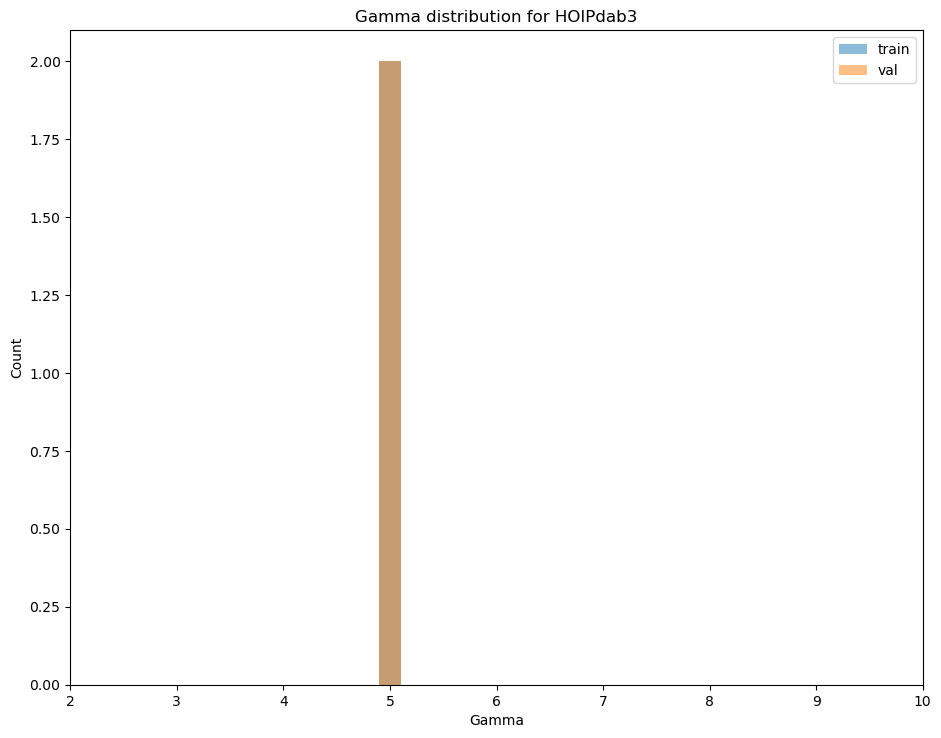

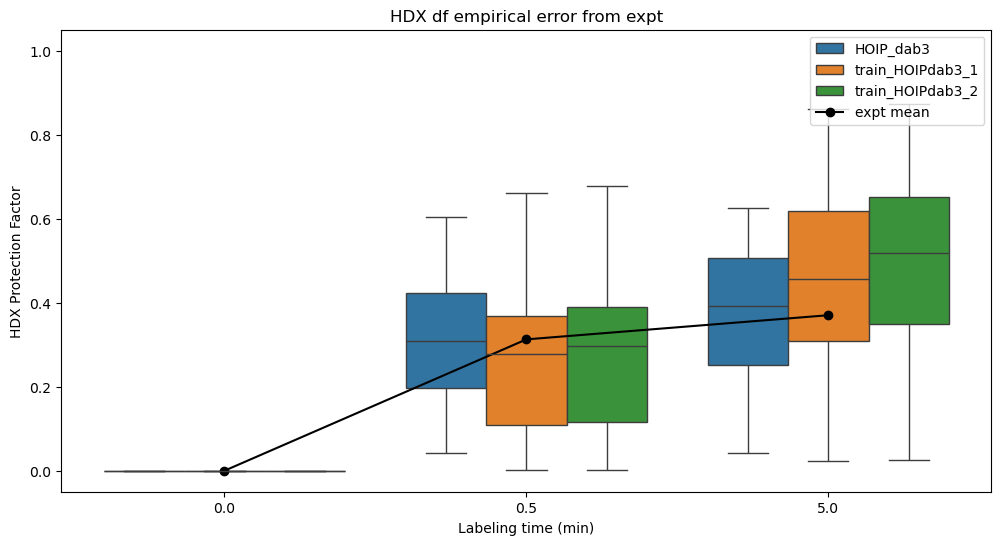

plot_dfracs_compare
     0.0      0.5      5.0  peptide         calc_name
0    0.0  0.46673  0.43596        0         HOIP_dab3
1    0.0  0.32902  0.41733        1         HOIP_dab3
2    0.0  0.43768  0.51465        2         HOIP_dab3
3    0.0  0.49407  0.55019        3         HOIP_dab3
4    0.0  0.40974  0.49974        4         HOIP_dab3
5    0.0  0.46549  0.53269        5         HOIP_dab3
6    0.0  0.51865  0.57563        6         HOIP_dab3
7    0.0  0.42895  0.50591        7         HOIP_dab3
8    0.0  0.48708  0.54480        8         HOIP_dab3
9    0.0  0.49018  0.55412        9         HOIP_dab3
10   0.0  0.52224  0.58478       10         HOIP_dab3
11   0.0  0.49008  0.53189       11         HOIP_dab3
12   0.0  0.54360  0.57261       12         HOIP_dab3
13   0.0  0.54808  0.58305       13         HOIP_dab3
14   0.0  0.60312  0.62607       14         HOIP_dab3
15   0.0  0.57594  0.59822       15         HOIP_dab3
16   0.0  0.56090  0.58724       16         HOIP_dab3
17   0.0

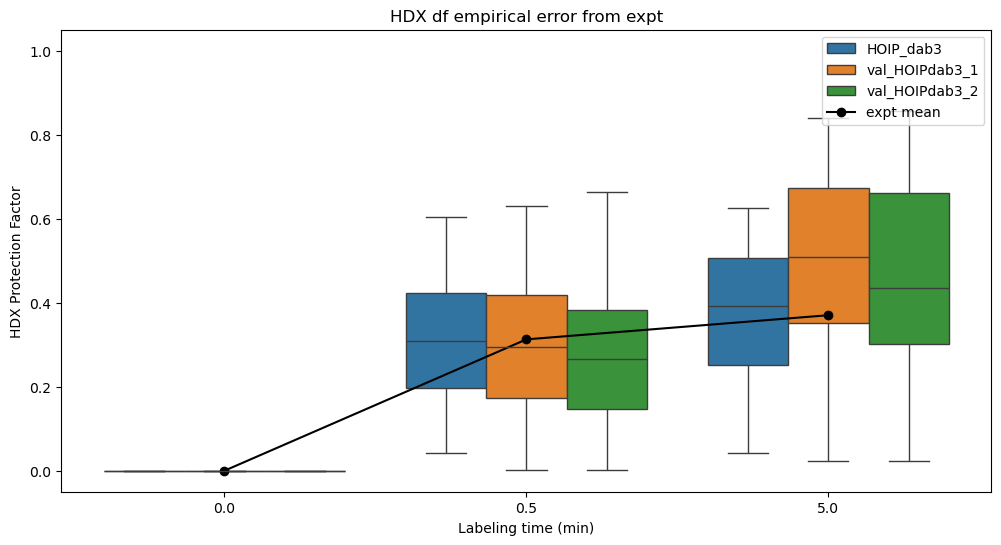

train_rep_names ['train_HOIPdab3_1', 'train_HOIPdab3_2']
val_rep_names ['val_HOIPdab3_1', 'val_HOIPdab3_2']
train_rep_peptides [77, 10, 4, 83, 62, 67, 30, 45, 95, 11, 81, 79, 0, 80, 18, 69, 56, 76, 106, 42, 12, 36, 64, 26, 22, 31, 47, 100, 15, 44, 88, 89, 9, 33, 55, 103, 28, 40, 5, 53, 107, 39, 35, 16, 78, 34, 66, 7, 43, 65, 72, 27, 19, 90]
val_rep_peptides [1, 2, 3, 6, 8, 13, 14, 17, 20, 21, 23, 24, 25, 29, 32, 37, 38, 41, 46, 48, 49, 50, 51, 52, 54, 57, 58, 59, 60, 61, 63, 68, 70, 71, 73, 74, 75, 82, 84, 85, 86, 87, 91, 92, 93, 94, 96, 97, 98, 99, 101, 102, 104, 105]
train_rep_peptides [2, 33, 22, 44, 101, 62, 55, 20, 15, 80, 70, 11, 99, 63, 94, 85, 9, 0, 8, 13, 5, 1, 105, 96, 95, 37, 12, 78, 102, 90, 100, 71, 79, 92, 39, 38, 19, 14, 56, 84, 45, 43, 24, 6, 67, 23, 18, 42, 46, 86, 93, 31, 72, 27]
val_rep_peptides [3, 4, 7, 10, 16, 17, 21, 25, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 64, 65, 66, 68, 69, 73, 74, 75, 76, 77, 81, 82, 83, 

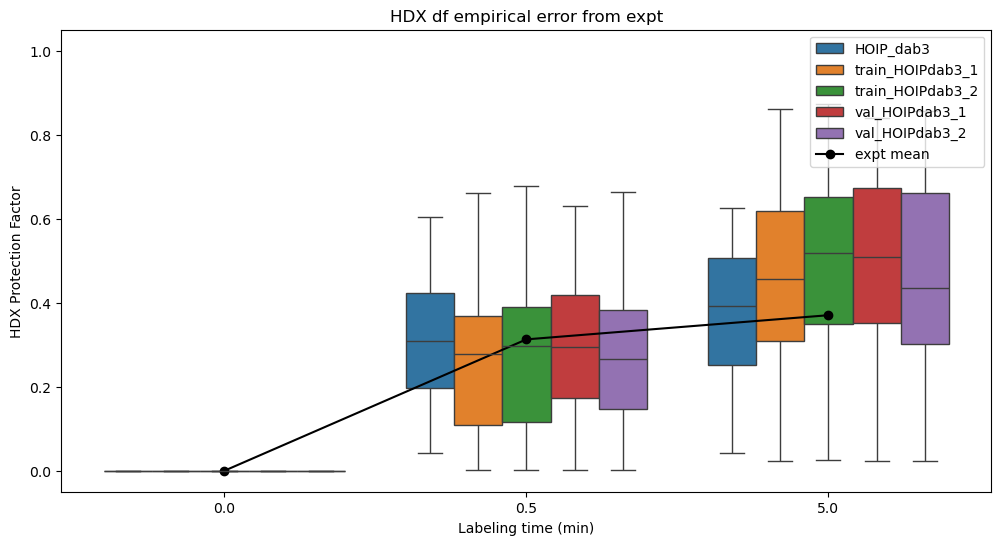

plotting paired errors
     0.0      0.5      5.0  peptide         calc_name
0    0.0  0.46673  0.43596        0         HOIP_dab3
1    0.0  0.32902  0.41733        1         HOIP_dab3
2    0.0  0.43768  0.51465        2         HOIP_dab3
3    0.0  0.49407  0.55019        3         HOIP_dab3
4    0.0  0.40974  0.49974        4         HOIP_dab3
5    0.0  0.46549  0.53269        5         HOIP_dab3
6    0.0  0.51865  0.57563        6         HOIP_dab3
7    0.0  0.42895  0.50591        7         HOIP_dab3
8    0.0  0.48708  0.54480        8         HOIP_dab3
9    0.0  0.49018  0.55412        9         HOIP_dab3
10   0.0  0.52224  0.58478       10         HOIP_dab3
11   0.0  0.49008  0.53189       11         HOIP_dab3
12   0.0  0.54360  0.57261       12         HOIP_dab3
13   0.0  0.54808  0.58305       13         HOIP_dab3
14   0.0  0.60312  0.62607       14         HOIP_dab3
15   0.0  0.57594  0.59822       15         HOIP_dab3
16   0.0  0.56090  0.58724       16         HOIP_dab3
17   

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


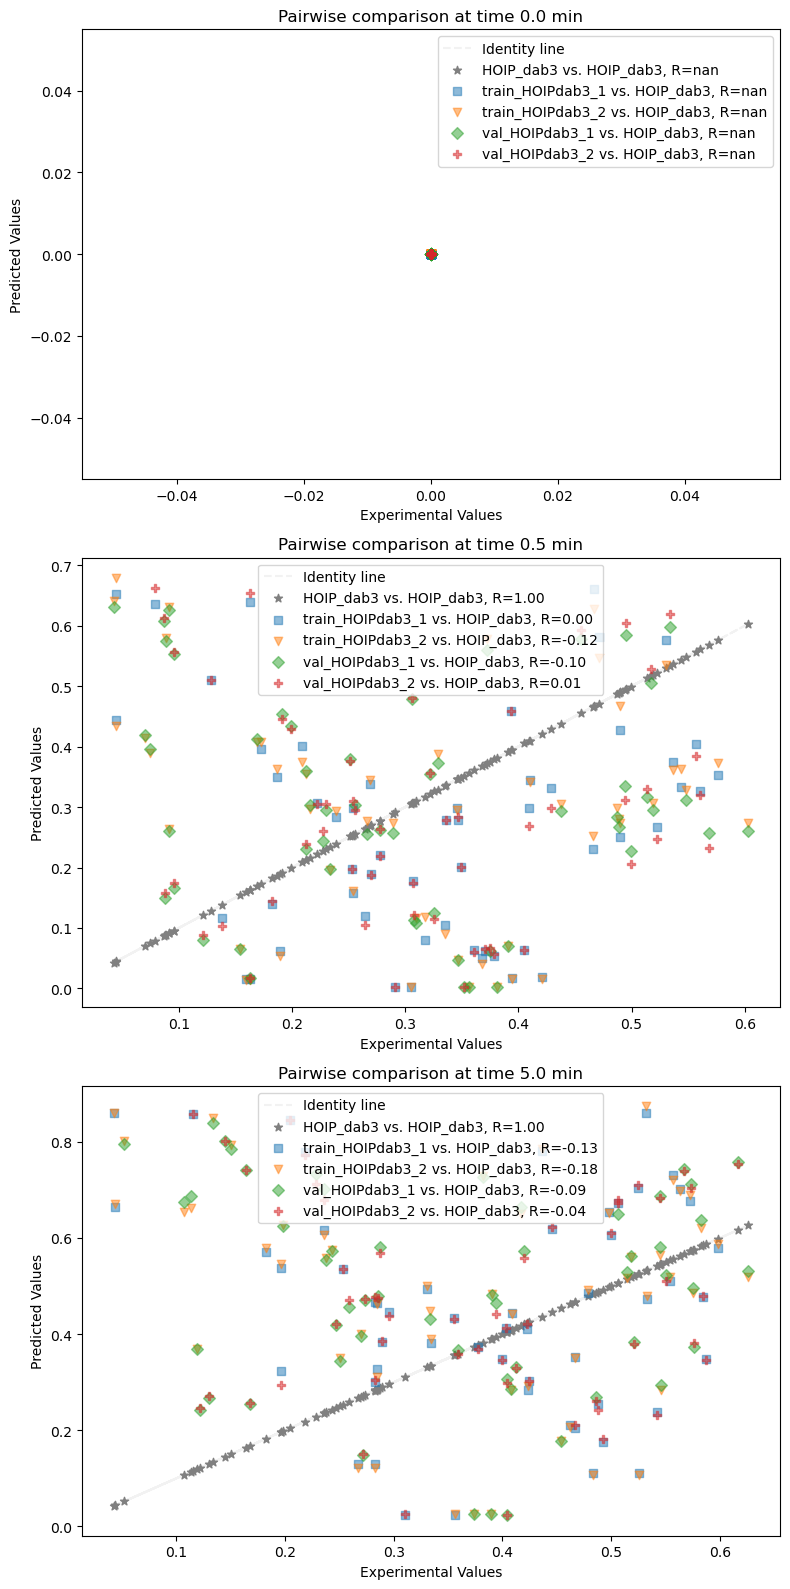

plotting paired trainval agreement
     0.0      0.5      5.0  peptide         calc_name
0    0.0  0.46673  0.43596        0         HOIP_dab3
1    0.0  0.32902  0.41733        1         HOIP_dab3
2    0.0  0.43768  0.51465        2         HOIP_dab3
3    0.0  0.49407  0.55019        3         HOIP_dab3
4    0.0  0.40974  0.49974        4         HOIP_dab3
5    0.0  0.46549  0.53269        5         HOIP_dab3
6    0.0  0.51865  0.57563        6         HOIP_dab3
7    0.0  0.42895  0.50591        7         HOIP_dab3
8    0.0  0.48708  0.54480        8         HOIP_dab3
9    0.0  0.49018  0.55412        9         HOIP_dab3
10   0.0  0.52224  0.58478       10         HOIP_dab3
11   0.0  0.49008  0.53189       11         HOIP_dab3
12   0.0  0.54360  0.57261       12         HOIP_dab3
13   0.0  0.54808  0.58305       13         HOIP_dab3
14   0.0  0.60312  0.62607       14         HOIP_dab3
15   0.0  0.57594  0.59822       15         HOIP_dab3
16   0.0  0.56090  0.58724       16         HOI

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1340: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1359: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is de

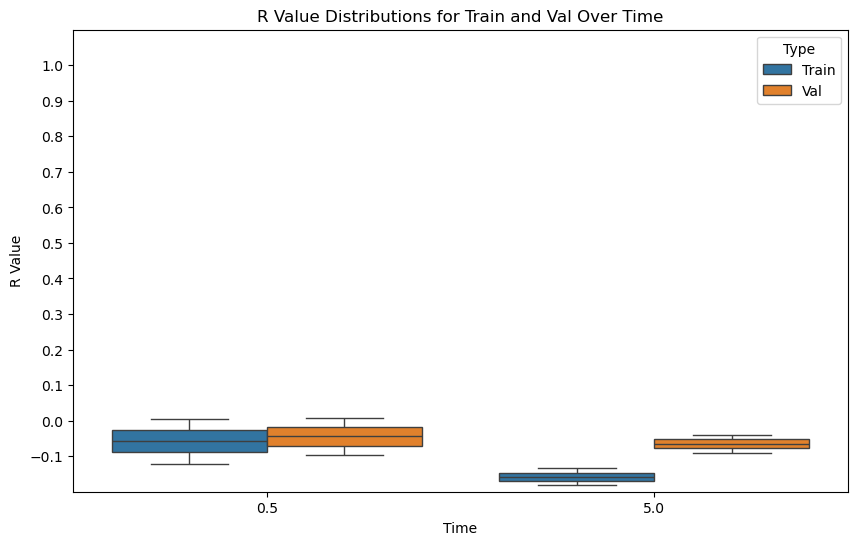

nan_df
     0.0      0.5      5.0  peptide         calc_name
0    0.0  0.27846  0.41037       77  train_HOIPdab3_1
1    0.0  0.26674  0.47638       10  train_HOIPdab3_1
2    0.0  0.29928  0.60638        4  train_HOIPdab3_1
3    0.0  0.63960  0.84474       83  train_HOIPdab3_1
4    0.0  0.57650  0.73072       62  train_HOIPdab3_1
5    0.0  0.15819  0.38237       67  train_HOIPdab3_1
6    0.0  0.27911  0.41372       30  train_HOIPdab3_1
7    0.0  0.06140  0.32785       45  train_HOIPdab3_1
8    0.0  0.44474  0.66466       95  train_HOIPdab3_1
9    0.0  0.42699  0.86081       11  train_HOIPdab3_1
10   0.0  0.63616  0.85706       81  train_HOIPdab3_1
11   0.0  0.39608  0.57045       79  train_HOIPdab3_1
12   0.0  0.66059  0.78053        0  train_HOIPdab3_1
13   0.0  0.65257  0.86026       80  train_HOIPdab3_1
14   0.0  0.01498  0.12947       18  train_HOIPdab3_1
15   0.0  0.45828  0.61766       69  train_HOIPdab3_1
16   0.0  0.58060  0.70177       56  train_HOIPdab3_1
17   0.0  0.11655  0.

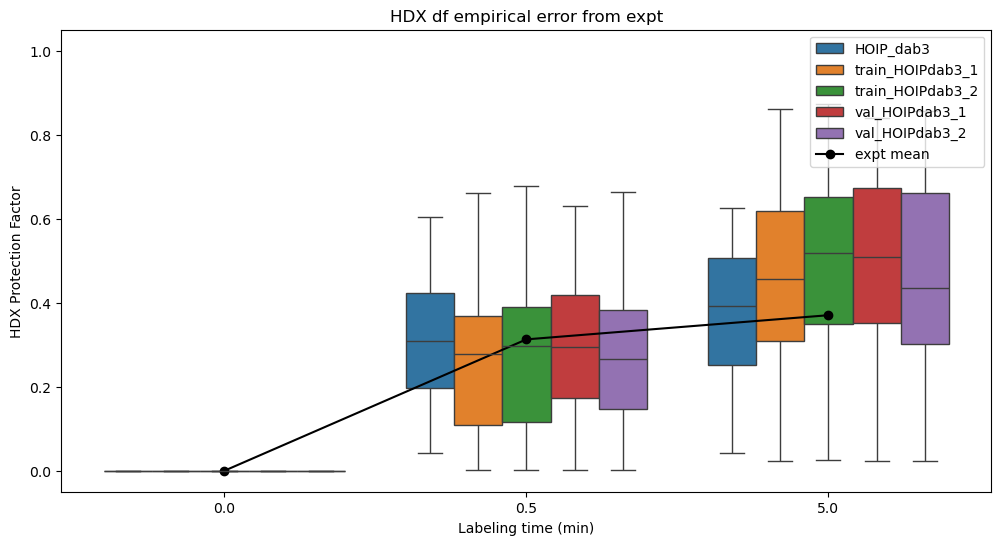

plot_dfracs_compare_abs
     0.0      0.5      5.0  peptide         calc_name
0    0.0  0.27846  0.41037       77  train_HOIPdab3_1
1    0.0  0.26674  0.47638       10  train_HOIPdab3_1
2    0.0  0.29928  0.60638        4  train_HOIPdab3_1
3    0.0  0.63960  0.84474       83  train_HOIPdab3_1
4    0.0  0.57650  0.73072       62  train_HOIPdab3_1
5    0.0  0.15819  0.38237       67  train_HOIPdab3_1
6    0.0  0.27911  0.41372       30  train_HOIPdab3_1
7    0.0  0.06140  0.32785       45  train_HOIPdab3_1
8    0.0  0.44474  0.66466       95  train_HOIPdab3_1
9    0.0  0.42699  0.86081       11  train_HOIPdab3_1
10   0.0  0.63616  0.85706       81  train_HOIPdab3_1
11   0.0  0.39608  0.57045       79  train_HOIPdab3_1
12   0.0  0.66059  0.78053        0  train_HOIPdab3_1
13   0.0  0.65257  0.86026       80  train_HOIPdab3_1
14   0.0  0.01498  0.12947       18  train_HOIPdab3_1
15   0.0  0.45828  0.61766       69  train_HOIPdab3_1
16   0.0  0.58060  0.70177       56  train_HOIPdab3_1
17  

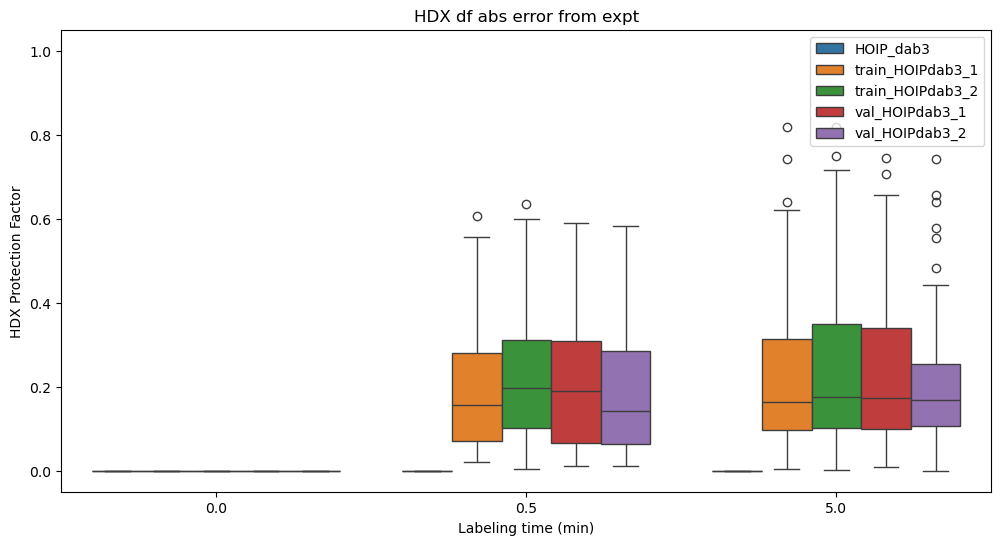

plot_dfracs_compare_MSE
     0.0      0.5      5.0  peptide         calc_name
0    0.0  0.27846  0.41037       77  train_HOIPdab3_1
1    0.0  0.26674  0.47638       10  train_HOIPdab3_1
2    0.0  0.29928  0.60638        4  train_HOIPdab3_1
3    0.0  0.63960  0.84474       83  train_HOIPdab3_1
4    0.0  0.57650  0.73072       62  train_HOIPdab3_1
5    0.0  0.15819  0.38237       67  train_HOIPdab3_1
6    0.0  0.27911  0.41372       30  train_HOIPdab3_1
7    0.0  0.06140  0.32785       45  train_HOIPdab3_1
8    0.0  0.44474  0.66466       95  train_HOIPdab3_1
9    0.0  0.42699  0.86081       11  train_HOIPdab3_1
10   0.0  0.63616  0.85706       81  train_HOIPdab3_1
11   0.0  0.39608  0.57045       79  train_HOIPdab3_1
12   0.0  0.66059  0.78053        0  train_HOIPdab3_1
13   0.0  0.65257  0.86026       80  train_HOIPdab3_1
14   0.0  0.01498  0.12947       18  train_HOIPdab3_1
15   0.0  0.45828  0.61766       69  train_HOIPdab3_1
16   0.0  0.58060  0.70177       56  train_HOIPdab3_1
17  

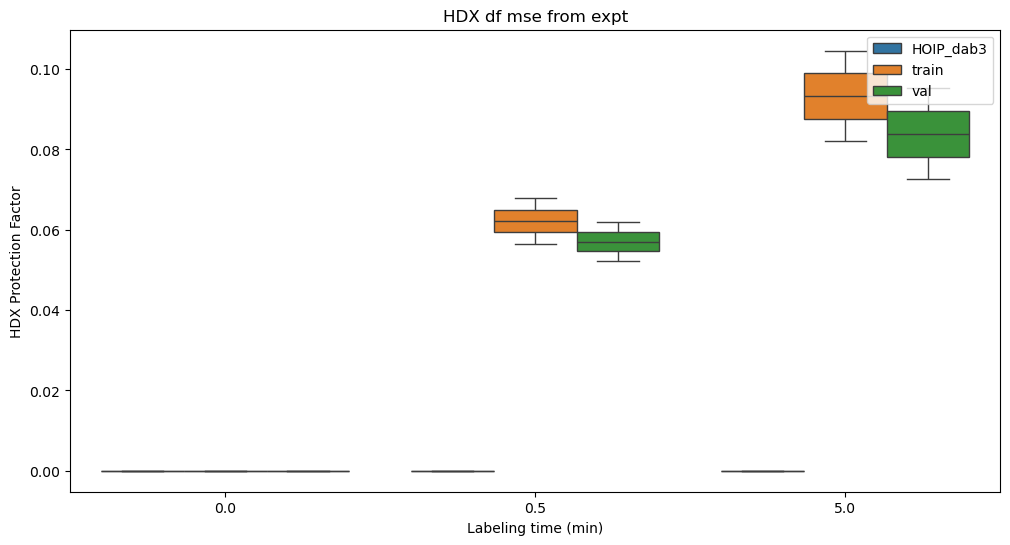

plotting paired errors
     0.0      0.5      5.0  peptide         calc_name
0    0.0  0.27846  0.41037       77  train_HOIPdab3_1
1    0.0  0.26674  0.47638       10  train_HOIPdab3_1
2    0.0  0.29928  0.60638        4  train_HOIPdab3_1
3    0.0  0.63960  0.84474       83  train_HOIPdab3_1
4    0.0  0.57650  0.73072       62  train_HOIPdab3_1
5    0.0  0.15819  0.38237       67  train_HOIPdab3_1
6    0.0  0.27911  0.41372       30  train_HOIPdab3_1
7    0.0  0.06140  0.32785       45  train_HOIPdab3_1
8    0.0  0.44474  0.66466       95  train_HOIPdab3_1
9    0.0  0.42699  0.86081       11  train_HOIPdab3_1
10   0.0  0.63616  0.85706       81  train_HOIPdab3_1
11   0.0  0.39608  0.57045       79  train_HOIPdab3_1
12   0.0  0.66059  0.78053        0  train_HOIPdab3_1
13   0.0  0.65257  0.86026       80  train_HOIPdab3_1
14   0.0  0.01498  0.12947       18  train_HOIPdab3_1
15   0.0  0.45828  0.61766       69  train_HOIPdab3_1
16   0.0  0.58060  0.70177       56  train_HOIPdab3_1
17   

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


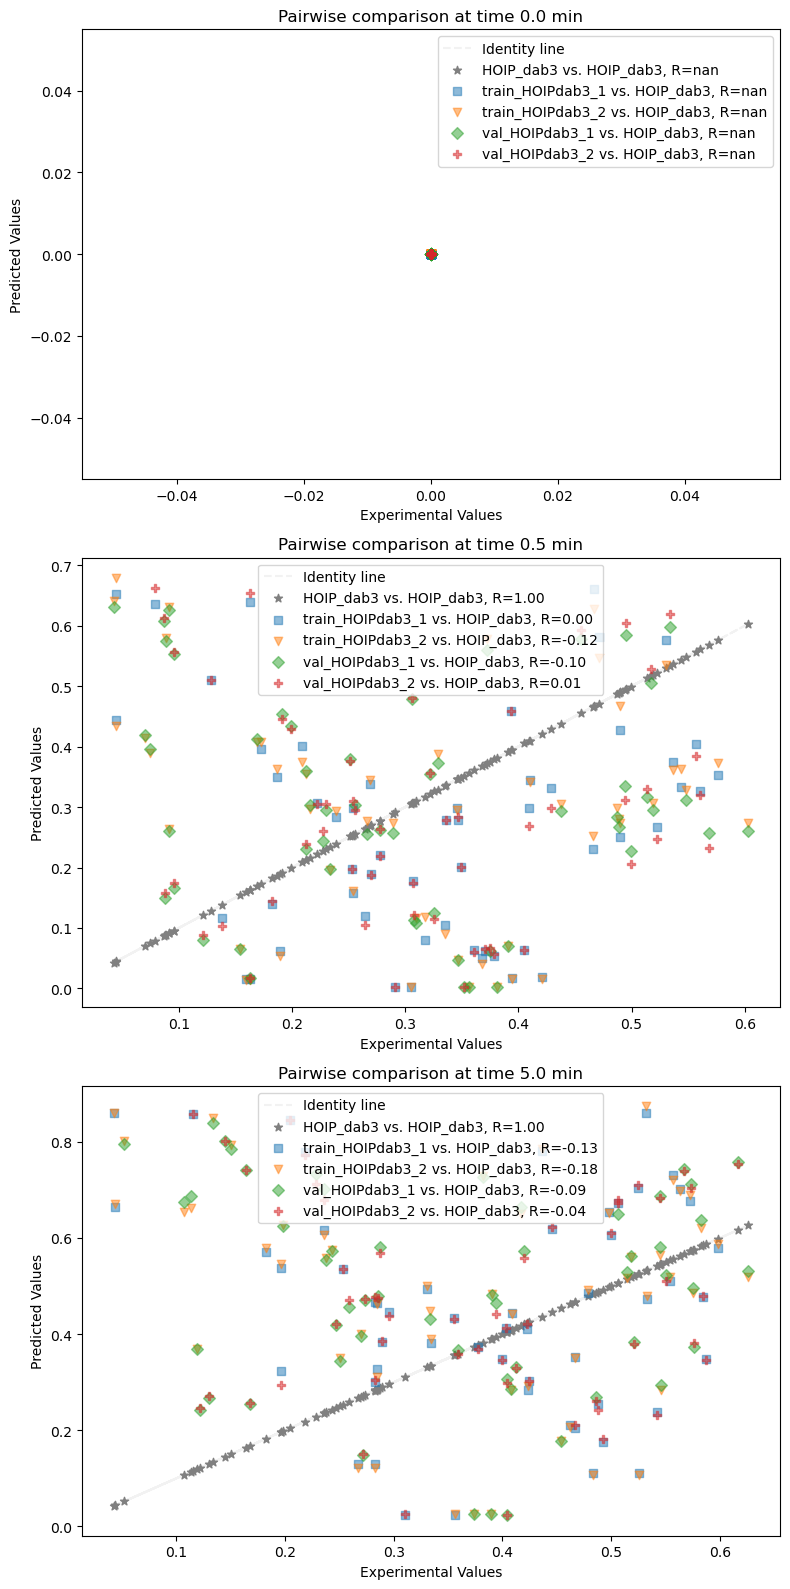

Train coverage: 74.07
Val coverage: 74.07
plot_dfracs_compare
     0.0      0.5      5.0  peptide           calc_name
0    0.0  0.46673  0.43596        0           HOIP_dab3
1    0.0  0.32902  0.41733        1           HOIP_dab3
2    0.0  0.43768  0.51465        2           HOIP_dab3
3    0.0  0.49407  0.55019        3           HOIP_dab3
4    0.0  0.40974  0.49974        4           HOIP_dab3
5    0.0  0.46549  0.53269        5           HOIP_dab3
6    0.0  0.51865  0.57563        6           HOIP_dab3
7    0.0  0.42895  0.50591        7           HOIP_dab3
8    0.0  0.48708  0.54480        8           HOIP_dab3
9    0.0  0.49018  0.55412        9           HOIP_dab3
10   0.0  0.52224  0.58478       10           HOIP_dab3
11   0.0  0.49008  0.53189       11           HOIP_dab3
12   0.0  0.54360  0.57261       12           HOIP_dab3
13   0.0  0.54808  0.58305       13           HOIP_dab3
14   0.0  0.60312  0.62607       14           HOIP_dab3
15   0.0  0.57594  0.59822       15       

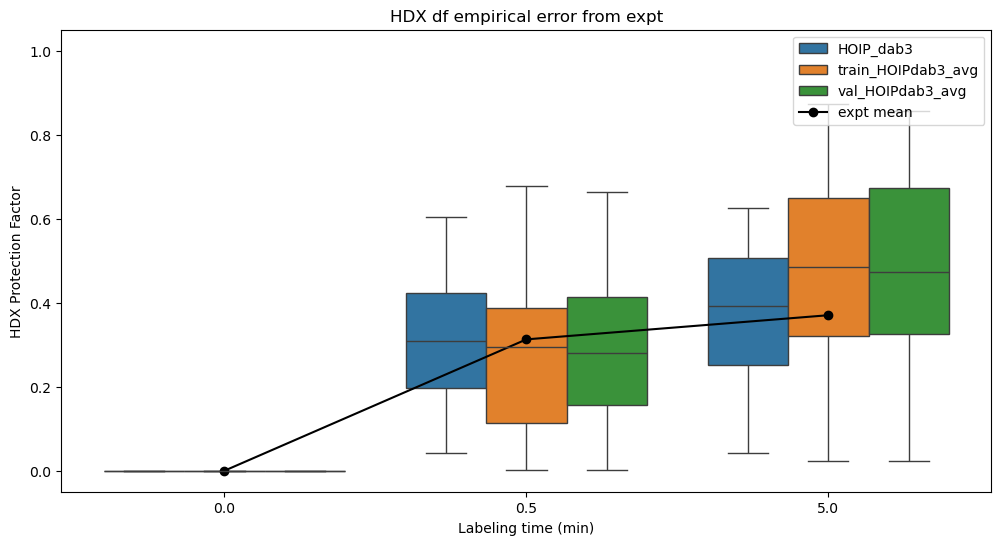

plotting paired errors
     0.0      0.5      5.0  peptide           calc_name
0    0.0  0.46673  0.43596        0           HOIP_dab3
1    0.0  0.32902  0.41733        1           HOIP_dab3
2    0.0  0.43768  0.51465        2           HOIP_dab3
3    0.0  0.49407  0.55019        3           HOIP_dab3
4    0.0  0.40974  0.49974        4           HOIP_dab3
5    0.0  0.46549  0.53269        5           HOIP_dab3
6    0.0  0.51865  0.57563        6           HOIP_dab3
7    0.0  0.42895  0.50591        7           HOIP_dab3
8    0.0  0.48708  0.54480        8           HOIP_dab3
9    0.0  0.49018  0.55412        9           HOIP_dab3
10   0.0  0.52224  0.58478       10           HOIP_dab3
11   0.0  0.49008  0.53189       11           HOIP_dab3
12   0.0  0.54360  0.57261       12           HOIP_dab3
13   0.0  0.54808  0.58305       13           HOIP_dab3
14   0.0  0.60312  0.62607       14           HOIP_dab3
15   0.0  0.57594  0.59822       15           HOIP_dab3
16   0.0  0.56090  0.5872

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


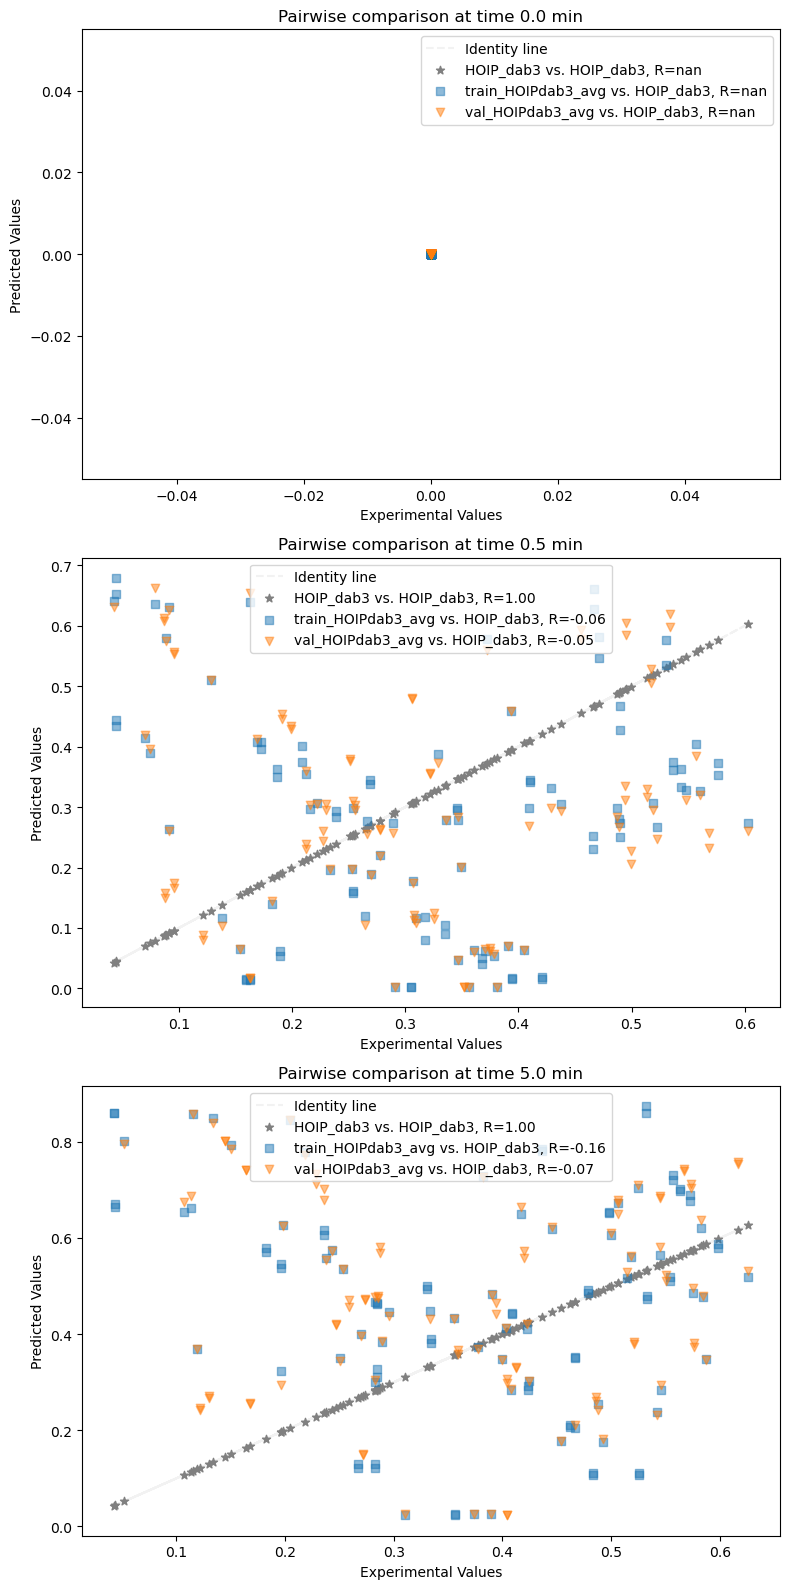

In [ ]:
with open('dump_test30.pickle', 'rb') as f:
    dump = pickle.load(f)

train_dfs, val_dfs, train_gammas, val_gammas = dump

VDX.evaluate_HDX(train_dfs=train_dfs, 
                 val_dfs=val_dfs, 
                 calc_name=test_name,
                 expt_name=expt_name,
                 train_gammas=train_gammas, 
                 val_gammas=val_gammas, 
                 n_reps=VDX.settings.replicates,
                   )

In [ ]:
import pandas as pd

In [ ]:
# file_name = "covid_submissions_all_info.csv"

In [ ]:
# sub_test = pd.read_csv(file_name)

In [ ]:
# sub_test.columns.to_list()